In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train_v9rqX0R.csv')
test=pd.read_csv('test_AbJTz2l.csv')

In [3]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
train.Item_Identifier.value_counts()

FDG33    10
FDW13    10
NCJ30     9
FDT07     9
FDX31     9
         ..
FDT35     1
FDO33     1
FDC23     1
FDK57     1
DRF48     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [5]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
train['Outlet_Size']=train.Outlet_Size.fillna(train.Outlet_Size.mode()[0])

In [7]:
train.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [8]:
train.Item_Weight=train.Item_Weight.fillna(train.Item_Weight.mean())

In [9]:
train.Item_Fat_Content.value_counts(dropna=False)

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [10]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace(['LF','low fat'],"Low Fat")

In [11]:
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(50000)

3000


In [12]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [13]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace(['reg'],"Regular")

In [14]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [15]:
col=train.select_dtypes(include=np.number)

In [16]:
col.columns[1:4]

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'], dtype='object')

<AxesSubplot:ylabel='Density'>

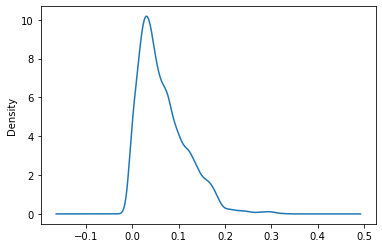

In [17]:
train.Item_Visibility.plot(kind='kde')

In [18]:
q1=train.Item_Visibility.quantile(0.25)
q3=train.Item_Visibility.quantile(0.75)
iqr=q3-q1
train=train.query("(@q1-1.5*@iqr)<=Item_Visibility<=(@q3+1.5*@iqr)")

In [22]:
obj=train.select_dtypes(include="object")
num=train.select_dtypes(include=np.number)

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [27]:
obj=obj.apply(le.fit_transform)

In [28]:
obj

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,0,4,9,1,0,1
1,8,1,14,3,1,2,2
2,662,0,10,9,1,0,1
3,1121,1,6,0,1,2,0
4,1297,0,9,1,0,2,1
...,...,...,...,...,...,...,...
8518,370,0,13,1,0,2,1
8519,897,1,0,7,1,1,1
8520,1357,0,8,6,2,1,1
8521,681,1,13,3,1,2,2


In [30]:
from sklearn.preprocessing import StandardScaler

In [35]:
train1=pd.concat([obj,train.select_dtypes(include=np.number)],axis=1)

In [36]:
train1

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,156,0,4,9,1,0,1,9.300,0.016047,249.8092,1999,3735.1380
1,8,1,14,3,1,2,2,5.920,0.019278,48.2692,2009,443.4228
2,662,0,10,9,1,0,1,17.500,0.016760,141.6180,1999,2097.2700
3,1121,1,6,0,1,2,0,19.200,0.000000,182.0950,1998,732.3800
4,1297,0,9,1,0,2,1,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,0,13,1,0,2,1,6.865,0.056783,214.5218,1987,2778.3834
8519,897,1,0,7,1,1,1,8.380,0.046982,108.1570,2002,549.2850
8520,1357,0,8,6,2,1,1,10.600,0.035186,85.1224,2004,1193.1136
8521,681,1,13,3,1,2,2,7.210,0.145221,103.1332,2009,1845.5976


In [37]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [41]:
from sklearn.model_selection import train_test_split
X=train1.drop(['Item_Outlet_Sales'],axis=1)
y=train1.Item_Outlet_Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [42]:
model=lr.fit(X_train,y_train)

In [43]:
model.score(X_train,y_train)

0.5038603360401379

In [44]:
ypred=model.predict(X_test)

In [49]:
model.score(X_test,y_test)

0.5082967981028093

In [50]:
model0=lr.fit(X,y)

In [51]:
model0.score(X,y)

0.505861585043728

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
tree=DecisionTreeRegressor()

In [54]:
treemodel=tree.fit(X,y)

In [55]:
treemodel.score(X,y)

1.0

In [59]:
treemodel.predict(X_test)

array([1717.764 , 6471.576 , 2694.4926, ..., 2994.7684, 1701.7848,
       5475.5392])

In [60]:
from sklearn.svm import SVR

In [61]:
svr=SVR()

In [62]:
modelsvr=svr.fit(X,y)

In [63]:
modelsvr.score(X,y)

-0.04561995172552913

In [67]:
ysvr=modelsvr.predict(X_test)

In [74]:
import math as maths

In [78]:
mse=np.square((np.subtract(ysvr,y_test)).mean())
rmse=maths.sqrt(mse)

In [79]:
rmse

381.43334010649454

In [1]:
try:
  print(1/0+"is good")
except:
  print("Exception")
finally:
  print("DataScience")

Exception
DataScience


In [2]:
order_total=[399,100,2939]
try:
    print(order_total[3])
except IndexError:
    print("Invalid Index")
except ValueError:
    print("Invalid Value")

Invalid Index


In [3]:
list1 = [[1,3],[5,4]]
print(sum(list1, []))

[1, 3, 5, 4]


In [4]:
s = {1, 2, 3, 1, 3, 4, 2, 1, 2}
print(len(s))

4
